In [1]:
import pandas as pd
import numpy as np
import os
import requests
import matplotlib.pyplot as plt
import seaborn as sns
import warcraft_logs_fn as wl
import log_analysis as la
%matplotlib inline

In [2]:
api_key = 'hidden'

### Import Guild Logs

In [3]:
guild_info = wl.GUILD_INFO

In [9]:
# Confirm start dates for Uldir logs
fights = requests.get("https://www.warcraftlogs.com:443/v1/reports/guild/Last%20Pull/Cenarius/US?api_key=" + api_key)
fights.json()                   

[{'id': 'kKrTnBRXgtW3aJHw',
  'title': 'Heroic Uldir',
  'owner': 'Shadowbaine',
  'start': 1536286264562,
  'end': 1536296297480,
  'zone': 19},
 {'id': 'PphkwMFDnmRgK37y',
  'title': 'Heroic Uldir',
  'owner': 'Shadowbaine',
  'start': 1536202744238,
  'end': 1536209098558,
  'zone': 19},
 {'id': 'yr8kTDGCdJcFjbHW',
  'title': 'Normal Uldir',
  'owner': 'Shadowbaine',
  'start': 1536199191219,
  'end': 1536202585991,
  'zone': 19},
 {'id': '1WDVZg2zYLHFNBcf',
  'title': 'Normal Uldir',
  'owner': 'Shadowbaine',
  'start': 1536106542010,
  'end': 1536116447454,
  'zone': 19},
 {'id': 'Cf129KrpDWPXT7xz',
  'title': 'Mythic Argus 2.0',
  'owner': 'Shadowbaine',
  'start': 1531274890714,
  'end': 1531285516023,
  'zone': 17},
 {'id': 'tnmFjCNGXJgVZYTz',
  'title': 'Aggramar sucks',
  'owner': 'Shadowbaine',
  'start': 1531187632213,
  'end': 1531198443503,
  'zone': 17},
 {'id': 'M1gC8Lr2HvyTjDpF',
  'title': 'Mythic Cleartorus',
  'owner': 'Shadowbaine',
  'start': 1530842431983,
  'end

Heroic Uldir starts at 1536202744238.

In [10]:
uldir_fights = requests.get('https://www.warcraftlogs.com:443/v1/reports/guild/Last%20Pull/Cenarius/US?start=1536202744238&api_key=' + api_key)
uldir_fights.json()

[{'id': 'kKrTnBRXgtW3aJHw',
  'title': 'Heroic Uldir',
  'owner': 'Shadowbaine',
  'start': 1536286264562,
  'end': 1536296297480,
  'zone': 19},
 {'id': 'PphkwMFDnmRgK37y',
  'title': 'Heroic Uldir',
  'owner': 'Shadowbaine',
  'start': 1536202744238,
  'end': 1536209098558,
  'zone': 19}]

In [6]:
log_info = wl.get_logs(api_key, guild_info, log_start=1536202744238)
log_info.head()

,log_id,log_start,log_end
0,kKrTnBRXgtW3aJHw,1536286264562,1536296297480
1,PphkwMFDnmRgK37y,1536202744238,1536209098558


In [12]:
wl.save_logs(log_info, api_key, guild_info, log_start=1536202744238)

Creating file kKrTnBRXgtW3aJHw
Creating file PphkwMFDnmRgK37y

All files created.



In [17]:
# Check for unwanted players in list
link = 'https://www.warcraftlogs.com:443/v1/report/fights/kKrTnBRXgtW3aJHw?api_key=' + api_key
log = requests.get(link)
friendlies = log.json()['friendlies']

In [21]:
for player in friendlies:
    print(player['name'])

Brian
Velryssa
Katanescence
Sumi
Vaelyra
Shadowbaine
Ayriea
Uuglei
Mythrose
Cagliostro
Psychodruid
Liavre
Earrl
Draigo
Metonymy
Tawn
Illestra
Petrol
Toy
Healing Stream Totem
Stradlock
Acturus
Jampers
Treant
Dough


These additional players (Healing Stream Totem and Treat) should be taken care of with existing function management.

In [4]:
boss_list = ['Taloc', 
             'MOTHER', 
             'Fetid Devourer', 
             "Zek'voz", 
             'Vectis',
             'Zul', 
             'Mythrax', 
             "G'Huun"]

In [5]:
fight_df = wl.extract_fights(boss_list)
fight_df.head()

Log ID kKrTnBRXgtW3aJHw done.
Log ID PphkwMFDnmRgK37y done.

Dataframe created.

Dataframe cleaned.


,log_id,pull_id,pull_start,pull_end,boss_id,boss_name,difficulty,kill,player_name
23,kKrTnBRXgtW3aJHw,2,445259,591173,2134,Vectis,4,False,Brian
24,kKrTnBRXgtW3aJHw,2,445259,591173,2134,Vectis,4,False,Velryssa
25,kKrTnBRXgtW3aJHw,2,445259,591173,2134,Vectis,4,False,Katanescence
26,kKrTnBRXgtW3aJHw,2,445259,591173,2134,Vectis,4,False,Sumi
27,kKrTnBRXgtW3aJHw,2,445259,591173,2134,Vectis,4,False,Vaelyra


In [7]:
wl.create_master_list(log_info, fight_df)


Master dataframe created.

master_list saved.


### Healthstone analysis

In [9]:
log_df = pd.read_csv('master_list.csv')
log_df.head()

,log_id,log_start,log_end,pull_id,pull_start,pull_end,boss_id,boss_name,kill,player_name
0,kKrTnBRXgtW3aJHw,1536286264562,1536296297480,2,445259,591173,2134,Vectis,False,Brian
1,kKrTnBRXgtW3aJHw,1536286264562,1536296297480,2,445259,591173,2134,Vectis,False,Velryssa
2,kKrTnBRXgtW3aJHw,1536286264562,1536296297480,2,445259,591173,2134,Vectis,False,Katanescence
3,kKrTnBRXgtW3aJHw,1536286264562,1536296297480,2,445259,591173,2134,Vectis,False,Sumi
4,kKrTnBRXgtW3aJHw,1536286264562,1536296297480,2,445259,591173,2134,Vectis,False,Vaelyra


In [11]:
player_names = pd.read_csv('player_list.csv')
player_names.head()

,player,primary_role,alt,tier_end,tier_start,start_date
0,Vaelyra,damage,NaN,NaN,True,NaN
1,Metonymy,damage,NaN,NaN,True,NaN
2,Brian,damage,NaN,NaN,True,NaN
3,Petrol,damage,NaN,NaN,True,NaN
4,Ayriea,damage,NaN,NaN,True,NaN


In [10]:
healthstones = wl.cast_count(api_key, log_df, 6262)

Player added: Brian
Player added: Toy
Player added: Psychodruid
Player added: Metonymy
Player added: Mythrose
Player added: Draigo
Player added: Stradlock
Player added: Earrl
Player added: Shadowbaine
Player added: Jampers
Player added: Liavre
Player added: Cagliostro
Player added: Tawn
Player added: Ayriea
Player added: Dough
Player added: Illestra
Player added: Velryssa
Player added: Sumi
Player added: Petrol
Player added: Acturus
Player added: Katanescence
Player added: Shadowbaine
Player added: Earrl
Player added: Brian
Player added: Illestra
Player added: Toy
Player added: Ayriea
Player added: Sumi
Player added: Liavre
Player added: Tawn
Player added: Mythrose
Player added: Jampers
Player added: Psychodruid
Player added: Acturus
Player added: Cagliostro
Player added: Metonymy
Player added: Draigo
Player added: Stradlock
Player added: Velryssa
Player added: Dough


In [12]:
healthstones.head()

,log_id,spell_id,player,count
0,kKrTnBRXgtW3aJHw,6262,Brian,8
1,kKrTnBRXgtW3aJHw,6262,Toy,5
2,kKrTnBRXgtW3aJHw,6262,Psychodruid,7
3,kKrTnBRXgtW3aJHw,6262,Metonymy,2
4,kKrTnBRXgtW3aJHw,6262,Mythrose,6


In [19]:
# Get number of pulls per log
log_df[log_df.log_id == 'kKrTnBRXgtW3aJHw'].pull_start.nunique()

17

In [22]:
log_df[log_df.log_id == 'PphkwMFDnmRgK37y'].pull_start.nunique()

11

In [28]:
# Create 'per pulls' column
healthstones['per_pull'] = healthstones['count']/17
healthstones[healthstones.log_id == 'PphkwMFDnmRgK37y'].per_pull = healthstones['count']/11
healthstones.head()

C:\Users\rebecca\Anaconda3\envs\dand\lib\site-packages\pandas\core\generic.py:3643: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


,log_id,spell_id,player,count,per_pull
0,kKrTnBRXgtW3aJHw,6262,Brian,8,0.470588
1,kKrTnBRXgtW3aJHw,6262,Toy,5,0.294118
2,kKrTnBRXgtW3aJHw,6262,Psychodruid,7,0.411765
3,kKrTnBRXgtW3aJHw,6262,Metonymy,2,0.117647
4,kKrTnBRXgtW3aJHw,6262,Mythrose,6,0.352941


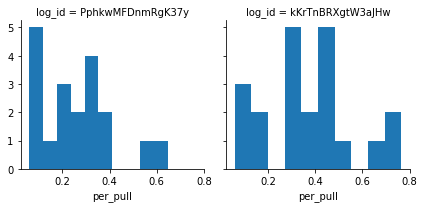

In [33]:
sns.FacetGrid(data=healthstones, 
              col='log_id', 
              col_order=['PphkwMFDnmRgK37y', 'kKrTnBRXgtW3aJHw'])\
.map(plt.hist, "per_pull");
plt.savefig('healthstones_per_pull_180907.png')

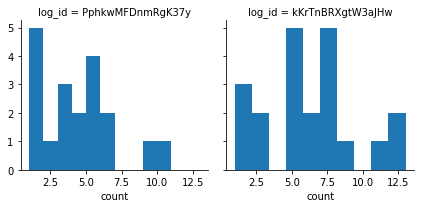

In [34]:
sns.FacetGrid(data=healthstones, 
              col='log_id', 
              col_order=['PphkwMFDnmRgK37y', 'kKrTnBRXgtW3aJHw'])\
.map(plt.hist, "count");
plt.savefig('healthstones_total_180907.png')

In [36]:
healthstones.groupby('log_id').per_pull.mean()

log_id
PphkwMFDnmRgK37y    0.235294
kKrTnBRXgtW3aJHw    0.364146
Name: per_pull, dtype: float64